Nama : Yulitta Irvine

NIM : 225314134

Data saya dapatkan dari link https://archive.ics.uci.edu/dataset/292/wholesale+customers 
Dikerjakan dengan jupyter notebook, extention pada file ini adalah .ipynb

Deskripsi data : Kumpulan data mengacu pada klien dari distributor grosir di wilayah portugal. Mencakup pengeluaran tahunan dalam satuan moneter (m.u) untuk berbagai kategori produk.

Disini, saya menganalisis dataset yang berisi data tentang berbagai jumlah pembelian tahunan pelanggan  dari berbagai kategori produk untuk struktur internal. Salah satu tujuan dari proyek ini adalah untuk menjelaskan variasi dalam berbagai jenis pelanggan yang berinteraksi dengan distributor grosir, sehingga distributor mendapat wawasan tentang bagaimana cara terbaik menyusun layanan pengiriman mereka untuk memenuhi setiap kebutuhan pelanggan.

Deskripsi dari dataset sebagai berikut:

Channel: horeca (house, restaurant, cafe) (1), retail (2)

Region: lokasi toko; Lisbon (1), Oporto (2), Other regions (3)

Fresh: jumlah pembelian produk segar

Milk: jumlah pembelian produk susu

Grocery: jumlah pembelian produk bahan kering

Frozen: jumlah pembelian produk es/beku

Detergents_Paper: jumlah pembelian produk detergent & kertas

Delicassen: jumlah pembelian produk delicatessen (berkualitas tinggi, bahan murni)


**Read Data**

Mengimport library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

Membaca Dataset

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


**Data Wrangling**

Mengecek informasi dan kolom pada data df

In [3]:
print(df.columns)
print(df.info)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698 

Data yang diunduh sudah numerik, sehingga tidak perlu melakukan encoding lagi

Mengecek ukuran data dan nilai yang memiliki nilai null

In [4]:
# checking the shape of the data
print(df.shape)
# check for missing values
df.isnull().sum()

(440, 8)


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# Cari duplikasi data dan perbaiki
print("\nJumlah duplikasi sebelum perbaikan:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Jumlah duplikasi sebelum perbaikan: 0


Tidak terdapat nilai null dan duplikasi, maka bisa langsung dilakukan proses selanjutnya yaitu data preprocessing

### Data Preprocessing

Normalisasi dataset dengan minmax scaler pada variabel yang memiliki data kuantitaif.

In [6]:
# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Mengambil hanya fitur-fitur numerik untuk dinormalisasi kecuali target data
numeric_features = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

# Melakukan normalisasi pada fitur-fitur numerik
normalized_features = scaler.fit_transform(numeric_features)

# Membuat DataFrame baru dari fitur-fitur yang sudah dinormalisasi
df_normalized = pd.DataFrame(normalized_features, columns=numeric_features.columns)

# Menampilkan hasil normalisasi
print("Hasil Normalisasi:")
print(df_normalized.head())

Hasil Normalisasi:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.112940  0.130727  0.081464  0.003106          0.065427    0.027847
1  0.062899  0.132824  0.103097  0.028548          0.080590    0.036984
2  0.056622  0.119181  0.082790  0.039116          0.086052    0.163559
3  0.118254  0.015536  0.045464  0.104842          0.012346    0.037234
4  0.201626  0.072914  0.077552  0.063934          0.043455    0.108093


In [7]:
df_normalized.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [8]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
dtypes: float64(6)
memory usage: 20.8 KB


Rangkuman statistik untuk data df

In [9]:
df_normalized.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis

Melihat persebaran data melalui grafik distribusi

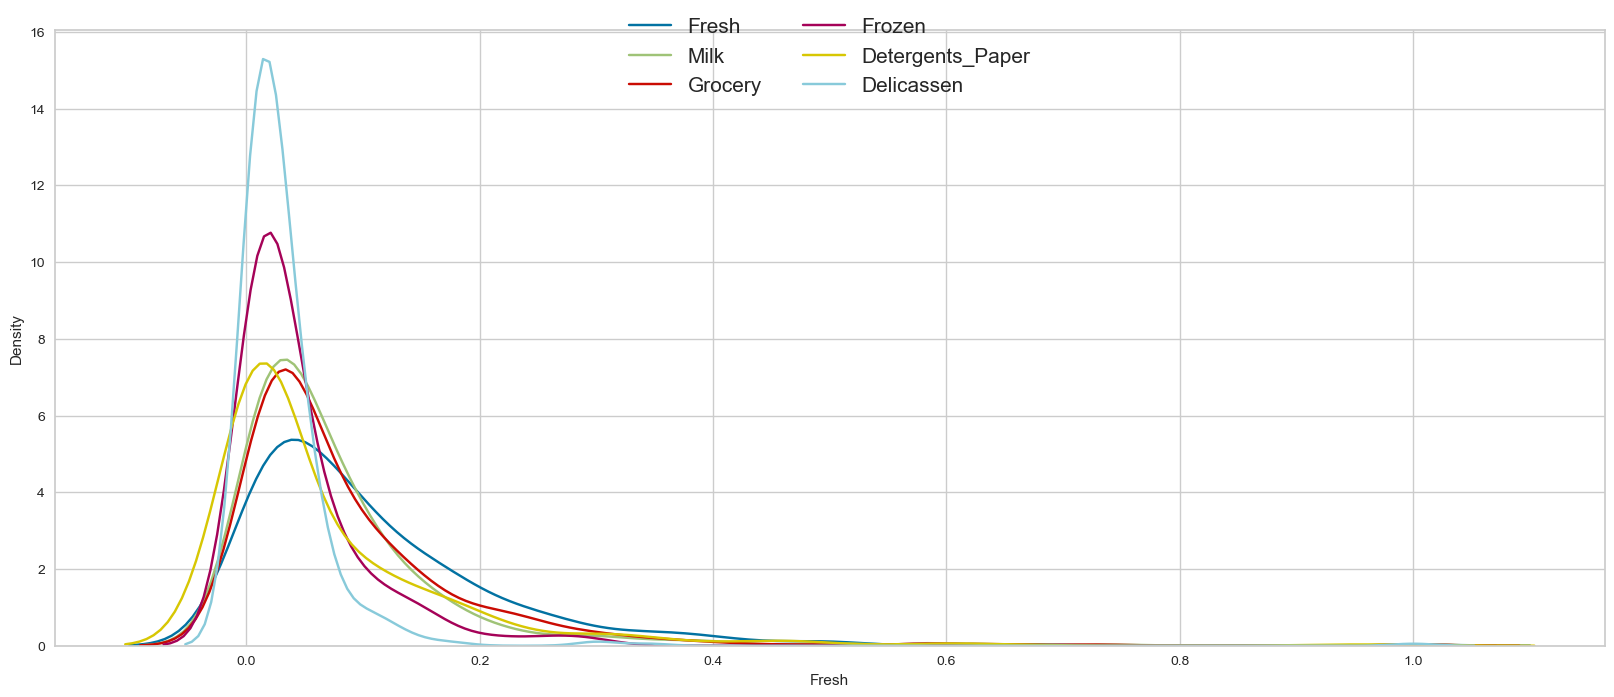

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 8))

# Iterate over columns and plot KDE
data = df_normalized
for col in data.columns.values:
    sns.kdeplot(data[col], label=col)

# Add legend outside the plot
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2, prop={'size': 15})

# Show the plot
plt.show()


Terdapat kencenderungan persebaran menghasilkan left-skewed pada beberapa kategori, artinya terdapat variansi yang cukup banyak sehingga persebarannya tidak merata, sehingga perlu diolah agar distribusinya bisa mendekati Distribusi normal dengan transformasi logaritmik .

Menambahkan kolom channel untuk dilakukan bivariate dan multivariate analisis

In [12]:
df_normalized['Channel'] = df['Channel']

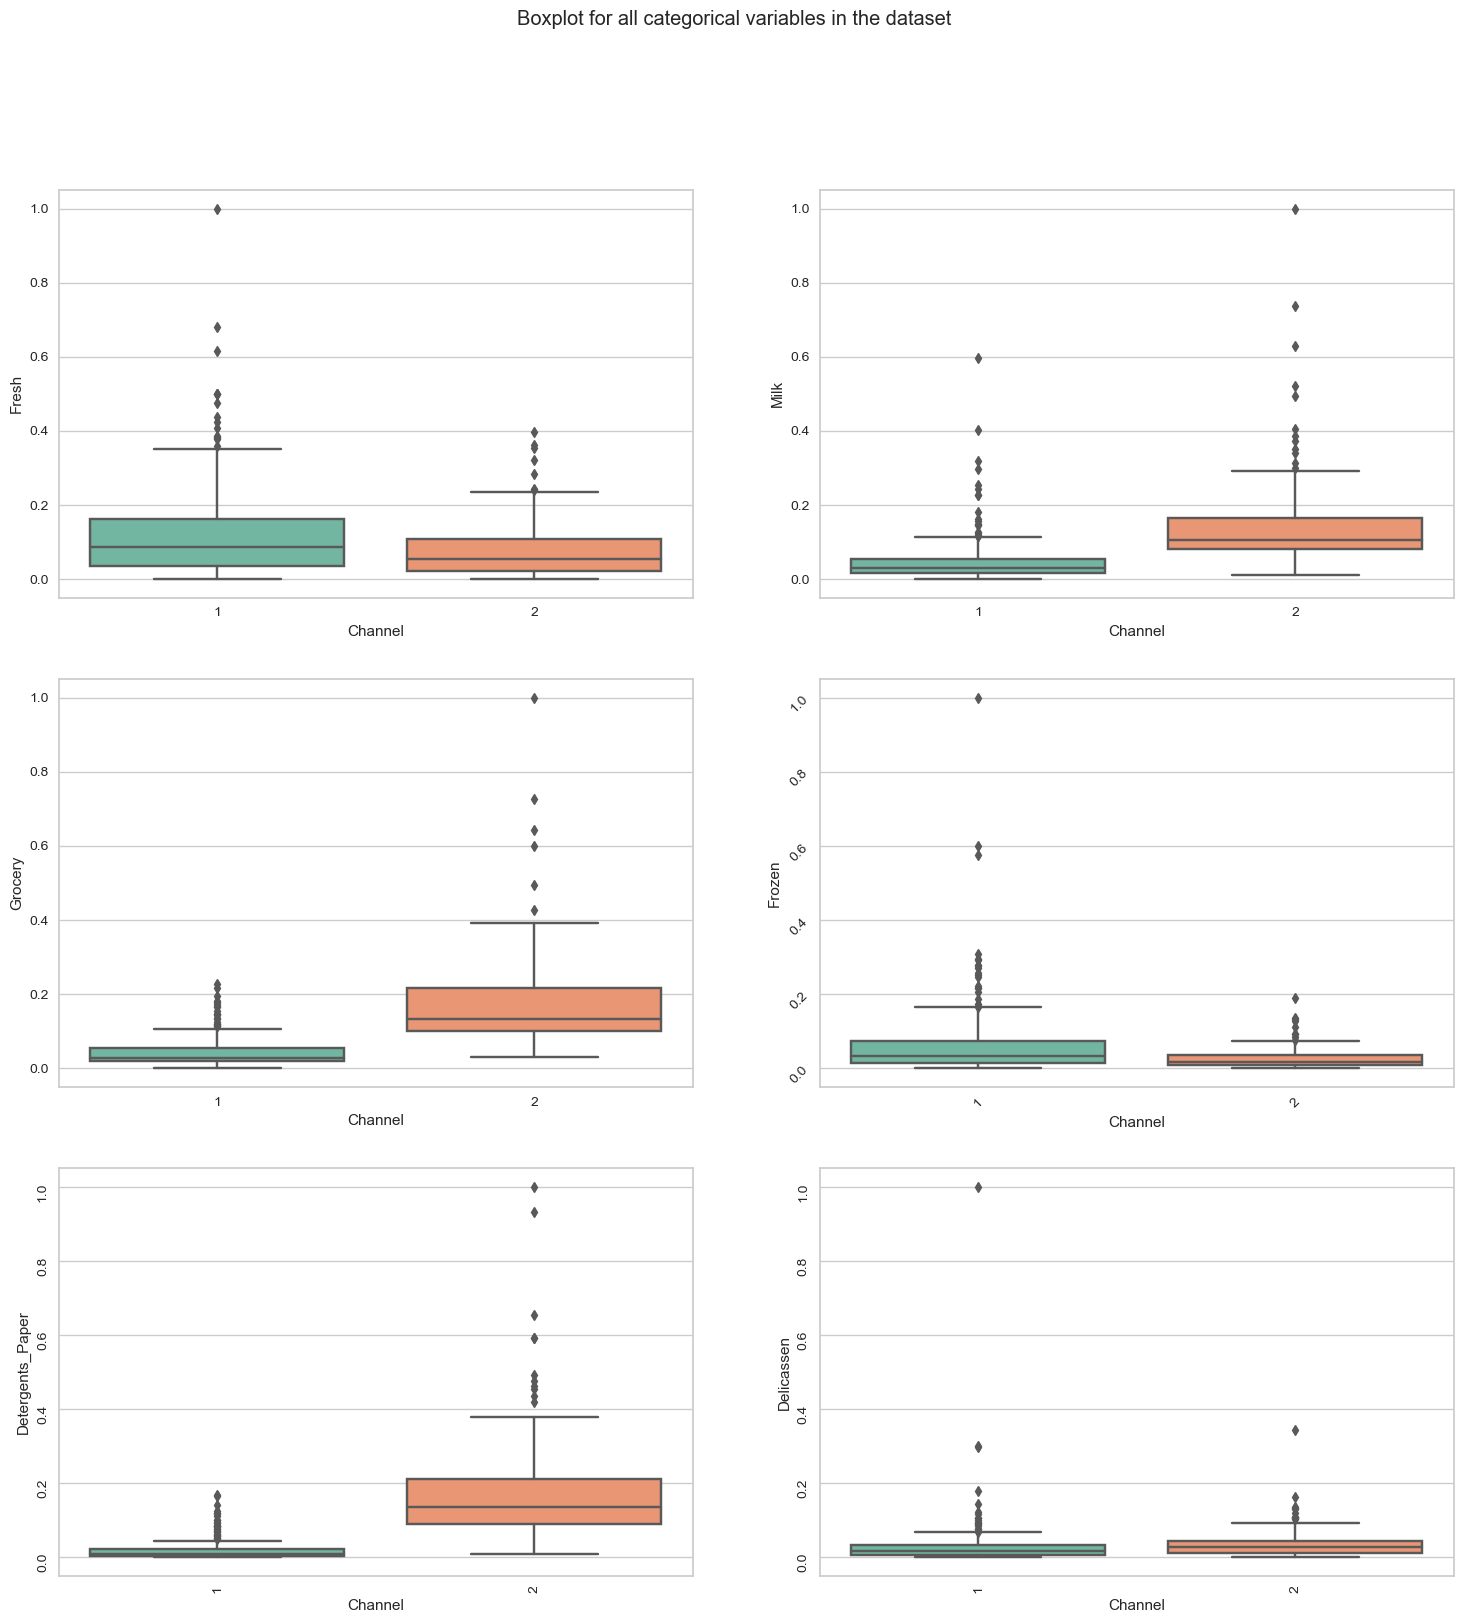

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# bivariate & multivariate analysis

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Boxplot for all categorical variables in the dataset')

sns.boxplot(ax=axes[0, 0], x='Channel',  y='Fresh',data=df_normalized, color='blue', palette="Set2")
sns.boxplot(ax=axes[0, 1], x='Channel',  y='Milk',data=df_normalized, color='blue', palette="Set2")
sns.boxplot(ax=axes[1, 0], x='Channel',  y='Grocery',data=df_normalized, color='blue', palette="Set2")
sns.boxplot(ax=axes[1, 1], x='Channel',  y='Frozen',data=df_normalized, color='blue', palette="Set2")
sns.boxplot(ax=axes[2, 0], x='Channel',  y='Detergents_Paper',data=df_normalized, color='blue', palette="Set2")
sns.boxplot(ax=axes[2, 1], x='Channel',  y='Delicassen',data=df_normalized, color='blue', palette="Set2")

axes[1, 1].tick_params(labelrotation=45)
axes[2, 0].tick_params(labelrotation=90)
axes[2, 1].tick_params(labelrotation=90)

plt.show()

Insight yang dapat diperoleh dari visualisasi boxplot di atas adalah sebagai berikut:
1. Rata-rata pengeluaran tahunan di channel 1 (house, restaurant, cafe) cenderung lebih tinggi untuk bahan makanan segar dan bahan makanan beku, sedangkan di channel 2 lebih tinggi untuk produk milk, grocery, detergents_paper, dan delicassen.
2. Konsumsi produk milk, grocery, detergents_paper, dan delicassen pada channel 2 cenderung stabil dan konsisten.
3. Outliers yang ada menunjukan outlier positif yang berarti ada data tidak normal berupa kelonjakan pengeluaran tahunan untuk produk tertentu.
4. Adanya outlier dalam persebaran data masing-masing produk dapat dipengaruhi oleh faktor musim, promosi, atau tren yang sedang berlangsung.

In [14]:
df_normalized = df_normalized.drop('Channel', axis = 1)

Multivariate analysis untuk melihat korelasi data dengan heatmap dan pairplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


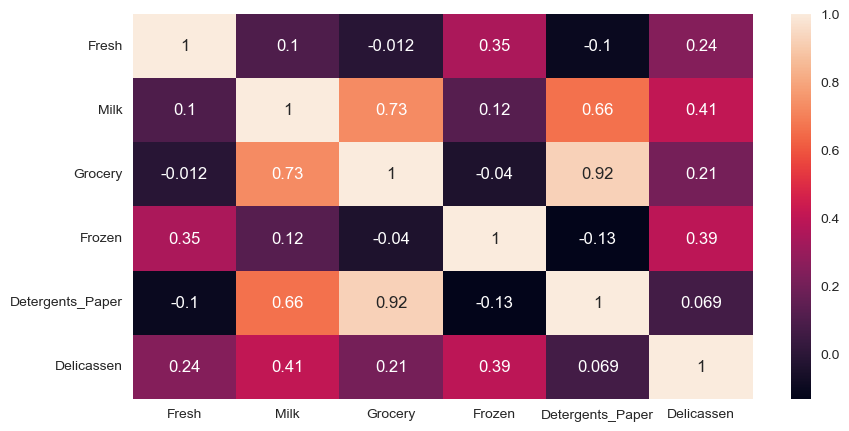

In [15]:
# Display the correlation heatmap
corr = df_normalized.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 15})

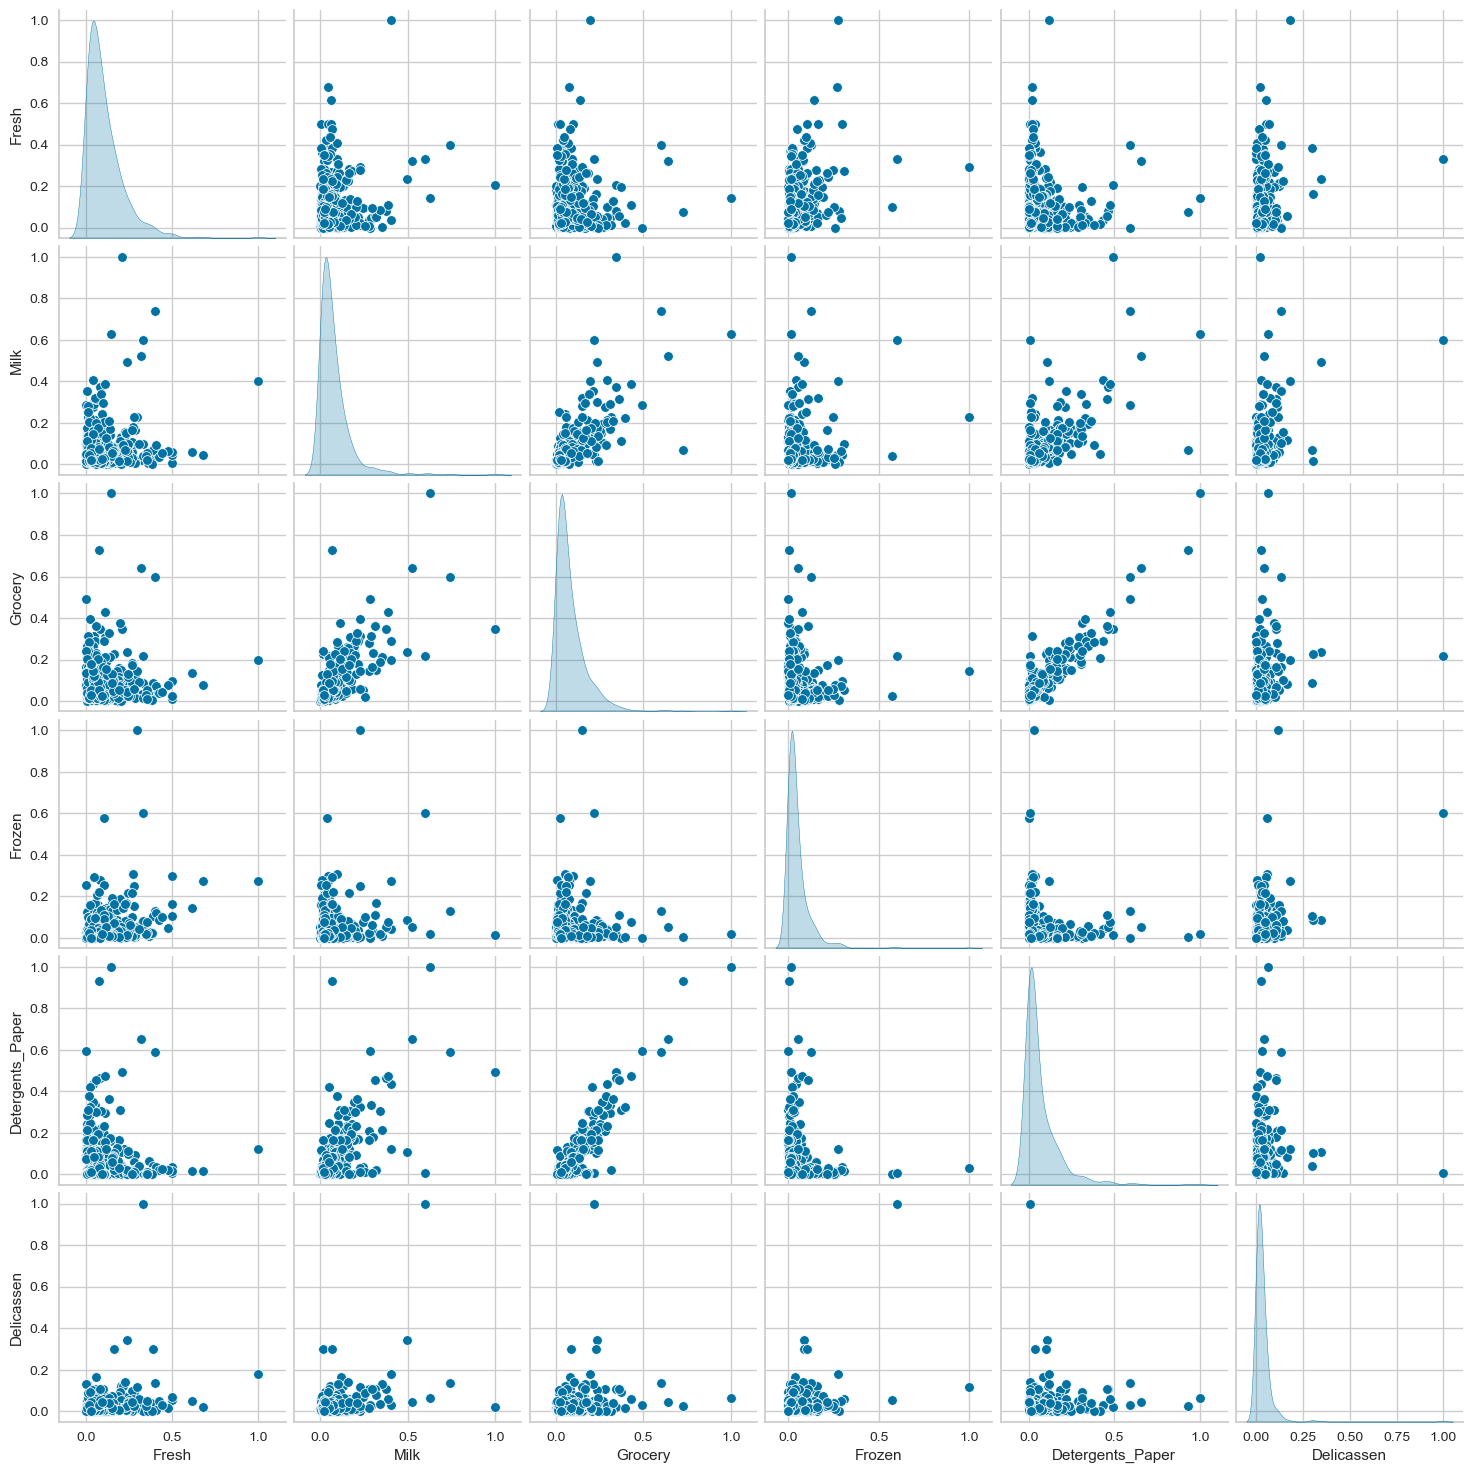

In [16]:
# Produce a scatter matrix for each pair of features in the data
g = sns.pairplot(df_normalized, diag_kind = 'kde')

Pada feature Fresh dan Frozen memiliki korelasi yang positif

Transformasi Logaritmik

Univariate analisis dan menghilangkan outlier

In [17]:
# remove kolom yang memiliki outliers
selected_data = df_normalized[df_normalized.isna().any(axis=1)]

# Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Loop melalui setiap kolom yang dipilih dan hapus outlier
for col in selected_data:
    df_normalized[col] = remove_outliers(df_normalized[col])


Karena ada outlier yang dihapus, maka data memiliki nilai NaN. untuk itu perlu dicek jumlah nilai NaN dalam setiap atribut

In [18]:
nan_values = df_normalized.isna().sum()


print("\nJumlah nilai NaN dalam setiap kolom:")
print(nan_values)


Jumlah nilai NaN dalam setiap kolom:
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64


Mengisi nilai yang kosong dengan nilai rata-ratanya, kemudian cek lagi apakah masih ada missing value

In [19]:
# impute missing values
df_imputed = df_normalized.fillna(df_normalized.mean())

print(df_imputed.isna().sum())

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Mengecek rangkuman statistik data setelah dihapus outliernya dan diisi dengan nilai rerata

In [20]:
df_imputed.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.090085,0.058158,0.067908,0.031421,0.045939,0.022717
std,0.075293,0.046268,0.057429,0.027455,0.054919,0.017519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.131870,0.083698,0.095474,0.041237,0.065770,0.031748
max,0.330215,0.210136,0.249243,0.125863,0.226876,0.075803


## PCA

Prinsipal component analysis : untuk mereduksi dimensi dataset df

In [21]:
from sklearn.decomposition import PCA
pca = PCA()

Model Building

In [22]:
pcomps = pca.fit_transform(df_imputed)
pcomps.shape

(440, 6)

In [23]:
pcomps

array([[ 0.03384311,  0.04969078,  0.04690135,  0.03234417, -0.01786811,
        -0.00070243],
       [ 0.0792147 ,  0.02226011,  0.04457506,  0.01059835,  0.00622691,
         0.00749892],
       [ 0.06883382,  0.00558992,  0.03301686,  0.0200513 ,  0.02119141,
        -0.00476563],
       ...,
       [ 0.03535042,  0.07699831,  0.12553578,  0.04961984, -0.01103353,
         0.00119855],
       [-0.05690803, -0.03425891,  0.00119237,  0.00431073, -0.01617224,
         0.02631138],
       [-0.01599465, -0.09167112, -0.00551115,  0.00785997, -0.0302445 ,
        -0.01185959]])

EigenValues and EigenVectors

Eigenvector: Arah-arah utama variansi dalam data Anda.
Eigenvalue: Besarnya variansi yang dijelaskan oleh setiap eigenvector (semakin tinggi nilainya, semakin penting).

In [24]:
eigen_values = pca.explained_variance_
eigen_vector = pca.components_
print("Eigen values : \n",eigen_values)
print("Eigen vector : \n",eigen_vector)

Eigen values : 
 [0.00727427 0.00513884 0.0010322  0.00077493 0.000697   0.00026746]
Eigen vector : 
 [[-0.5360163   0.35715838  0.53152077 -0.08127577  0.54389716  0.01342459]
 [ 0.83267549  0.28640297  0.3970779   0.02448889  0.2462941   0.07545544]
 [-0.08610723  0.84653996 -0.1463515   0.05239028 -0.49230011  0.09712227]
 [ 0.09811651  0.24117005 -0.68250133 -0.40628421  0.54598893 -0.05684466]
 [-0.02548581  0.0741625  -0.26548032  0.90426697  0.31923595  0.06132083]
 [-0.040586   -0.10058952 -0.04591502 -0.08534739  0.03376681  0.98878813]]


In [25]:
# memilih komponen utam PCA berdasarkan eigen value
total = sum(eigen_values)
print("Sum of Eigen Values : ",total)
variance_eigen_value = [i*100/total for i in eigen_values]
print("Variance Eigen Values : \n",variance_eigen_value)
cumulative_variance_eigen_value = np.cumsum(variance_eigen_value)
print("Cumulative Variance Eigen Value : \n",cumulative_variance_eigen_value)

Sum of Eigen Values :  0.015184693714493389
Variance Eigen Values : 
 [47.905276071041264, 33.84225498996543, 6.797615245960358, 5.103358957023854, 4.590129596802073, 1.7613651392070189]
Cumulative Variance Eigen Value : 
 [ 47.90527607  81.74753106  88.54514631  93.64850526  98.23863486
 100.        ]


In [26]:
# validation
pcomps_res = np.dot(df_imputed,eigen_vector.T)
pcomps_res

array([[ 0.06515955,  0.18212232,  0.05967599,  0.01988689,  0.01059282,
         0.00800524],
       [ 0.11053114,  0.15469165,  0.0573497 , -0.00185892,  0.03468784,
         0.01620658],
       [ 0.10015026,  0.13802146,  0.0457915 ,  0.00759402,  0.04965234,
         0.00394204],
       ...,
       [ 0.06666686,  0.20942985,  0.13831042,  0.03716257,  0.0174274 ,
         0.00990621],
       [-0.02559158,  0.09817262,  0.01396701, -0.00814654,  0.01228869,
         0.03501904],
       [ 0.01532179,  0.04076042,  0.00726349, -0.00459731, -0.00178357,
        -0.00315192]])

In [27]:
pcomps

array([[ 0.03384311,  0.04969078,  0.04690135,  0.03234417, -0.01786811,
        -0.00070243],
       [ 0.0792147 ,  0.02226011,  0.04457506,  0.01059835,  0.00622691,
         0.00749892],
       [ 0.06883382,  0.00558992,  0.03301686,  0.0200513 ,  0.02119141,
        -0.00476563],
       ...,
       [ 0.03535042,  0.07699831,  0.12553578,  0.04961984, -0.01103353,
         0.00119855],
       [-0.05690803, -0.03425891,  0.00119237,  0.00431073, -0.01617224,
         0.02631138],
       [-0.01599465, -0.09167112, -0.00551115,  0.00785997, -0.0302445 ,
        -0.01185959]])

In [28]:
pca_df = pd.DataFrame(pcomps,columns=["PC1","PC2","PC3","PC4","PC5","PC6"])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.033843,0.049691,0.046901,0.032344,-0.017868,-0.000702
1,0.079215,0.022260,0.044575,0.010598,0.006227,0.007499
2,0.068834,0.005590,0.033017,0.020051,0.021191,-0.004766
3,-0.066295,-0.003044,-0.013428,-0.041194,0.058637,0.011128
4,-0.053386,0.101117,0.004401,-0.006645,0.024298,-0.009313


In [29]:
# pip install factor_analyzer

In [30]:
# Create factor analysis object and perform factor analysis
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

kmo_model

0.7349590519613884

Data cukup baik karena KMO > 0.5 untuk selanjutnya dapat dilakukan analisis faktor untuk proses lebih lanjut

In [31]:
from factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df_imputed, 6)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.44896021, 1.32460626, 0.84403021, 0.72244509, 0.41936215,
       0.24059608])

In [32]:
fa.loadings_

array([[-0.06391682, -0.02088996,  0.54905185],
       [-0.07214027,  1.0535035 , -0.07357819],
       [ 0.84482826,  0.0249925 ,  0.06115088],
       [-0.08198146, -0.06587501,  0.29722108],
       [ 0.93280229, -0.10174691, -0.15746907],
       [ 0.16901087,  0.11746248,  0.39446126]])

nilai loading >0.5 menunjukan ada korelasi antar atribut dengan principal component yang terbentuk.

Faktor 1 memiliki nilai factor loading yang tinggi untuk atribut ke 3 (grocery) dan ke 5 (detergen_paper)

Faktor 2 memiliki nilai factor loading yang tinggi untuk atribut ke 2 (milk)

Faktor 3 memiliki nilai factor loading yang tinggi untuk atribut ke 1 (fresh)


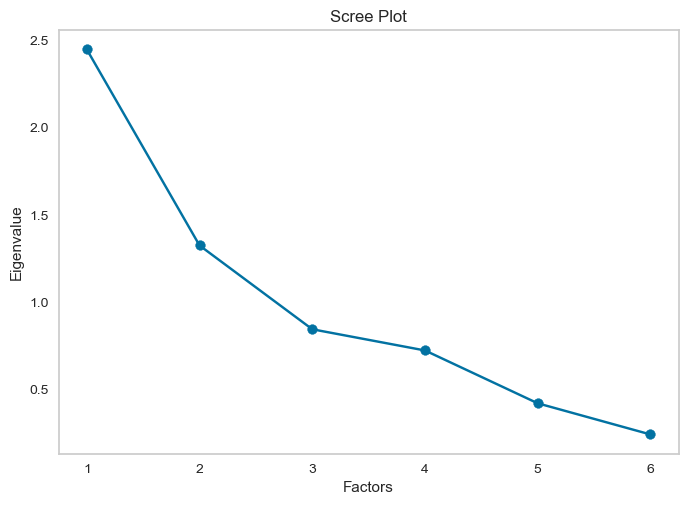

In [33]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_imputed.shape[1]+1),ev)
plt.plot(range(1,df_imputed.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Memilih 2 komponen PCA (PCA 1 dan PCA 2) :
karena nilainya lebih tinggi dari 1

In [34]:
final_pca = pca_df.iloc[:,:2]
final_pca.head()

,PC1,PC2
0,0.033843,0.049691
1,0.079215,0.022260
2,0.068834,0.005590
3,-0.066295,-0.003044
4,-0.053386,0.101117


KMeans Clustering

In [35]:
# Menginstall kneed
# !pip install kneed

Menentukan clustering dengan elbow dan silhouette

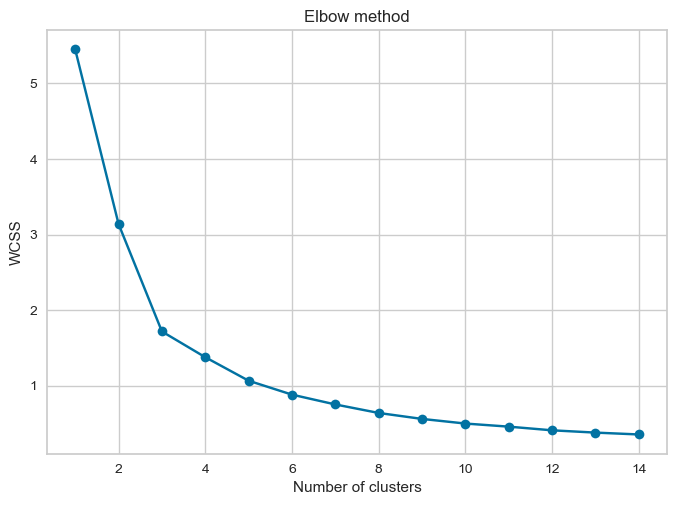

In [36]:
# menentukan klastering dengan elbow

# Elbow Methode - Inertias plot
wcss = []
# melakukan perulangan untuk menghitung inertia untuk setiap k
for k in range(1,15):
    model = KMeans(n_clusters=k, random_state = 42)
    model.fit(final_pca)
    wcss.append(model.inertia_)


# membuat plot dengan plt untuk menampilkan grafik elbow untuk menemukan jumlah klaster yang paling maksimal
plt.plot(range(1,15), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Mencari jumlah cluster terbaik dalam data dengan menambhakn nilai sse

In [37]:
kmeans_kwargs = {"init" : 'random' ,
                 "n_init" : 10 ,
                 "max_iter" : 300 ,
                 "random_state" : 42,}
error=[]
for k in range(1,15) :
  km=KMeans(n_clusters=k , **kmeans_kwargs)
  km.fit(final_pca)
  error.append(km.inertia_)

In [38]:
#membuat objek KneeLocator dengan parameter yg ditentukan
kn = KneeLocator(range(1,15),
                 error,
                 curve='convex', 
                 direction='decreasing')

In [39]:
#Mendapatkan jumlah cluster yang dianggap optimal
kn.elbow

3

Dengan methode elbow, jumlah klaster yang paling optimal ada di n = 3, selanjutnya membangun model kmeand dari data frame final_pca dan memprediksi clusternya

In [40]:
km = KMeans(n_clusters = 3, random_state = 42)
cluster = km.fit_predict(final_pca)

In [41]:
# Menambahkan kolom cluster ke dataset
final_pca['cluster'] = cluster

**Visualisasi data dengan Kmeans**

Mencari nilai inertia 

In [42]:
# Inertia (Sum of squared distances of samples to their closest cluster center)
inertia = model.inertia_
print(f"Inertia: {inertia}")


Inertia: 0.35327916437054124


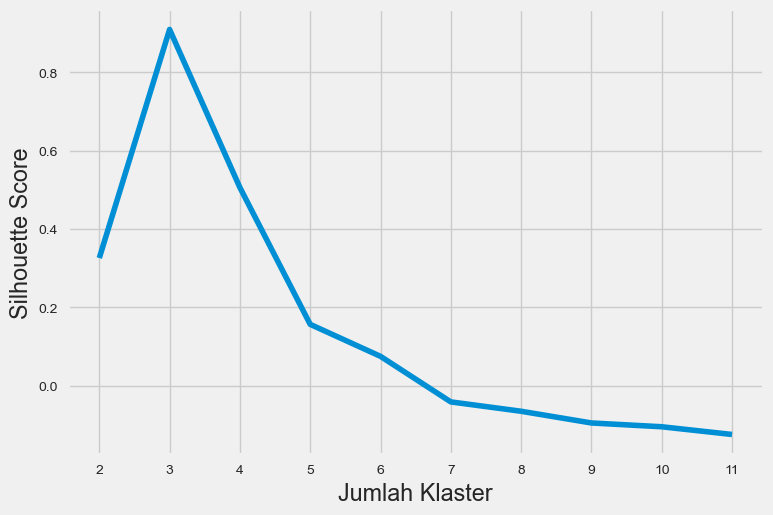

In [43]:
# Silhouette Coefficient (Koefisien Silhouette)
# Menghitung koefisien Silhouette untuk berbagai jumlah cluster (k) dari 2 hingga 11.
sc = []
for k in range(2, 12):
    sil = KMeans(n_clusters=k, random_state=42)
    sil.fit(df_imputed)
    score = silhouette_score(final_pca,sil.labels_)
    sc.append(score)

#Membuat grafik garis yang menunjukkan perubahan skor siluet terhadap jumlah klaster
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), sc)
plt.xticks(range(2, 12))
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.show()

Dengan methode silhoutte clusterisasi yang terbaik ada di n = 3, selanjutnya membuat model kmean dan memprediksi label untuk clustering

In [44]:
# Silhouette
kmean = KMeans(n_clusters=3, random_state=10)
kmean.fit(final_pca)

# Memperoleh label klaster untuk setiap sampel
labels = kmean.labels_

# Silhouette Score
silhouette_score = metrics.silhouette_score(final_pca, labels)
print(f"Silhouette Score untuk n-kluster = 3: {silhouette_score}")

Silhouette Score untuk n-kluster = 3: 0.9244726675901432


Visualisasi dengan silhouette plot

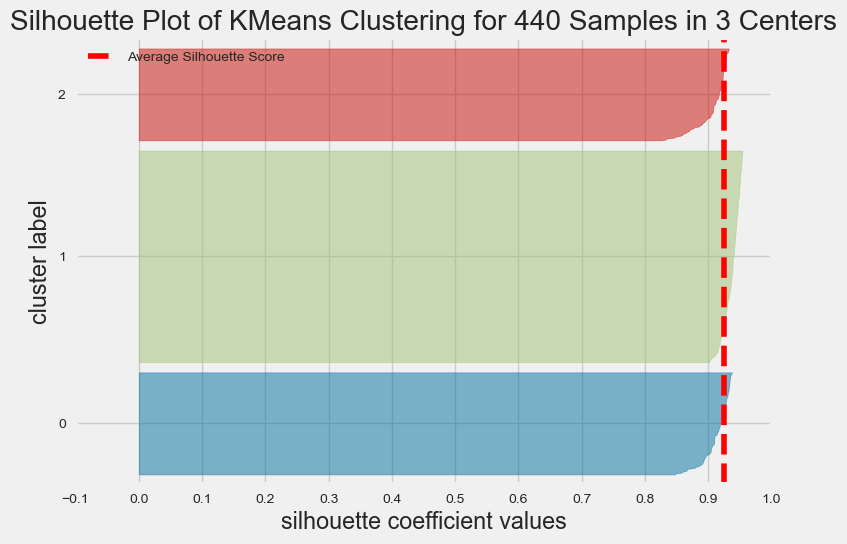

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 440 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
# visualisasi untuk n = 3
model = KMeans(n_clusters =3, random_state = 42)
visualizer = SilhouetteVisualizer(model, 
                                  colors = 'yellowbrick')

visualizer.fit(final_pca)
visualizer.show()

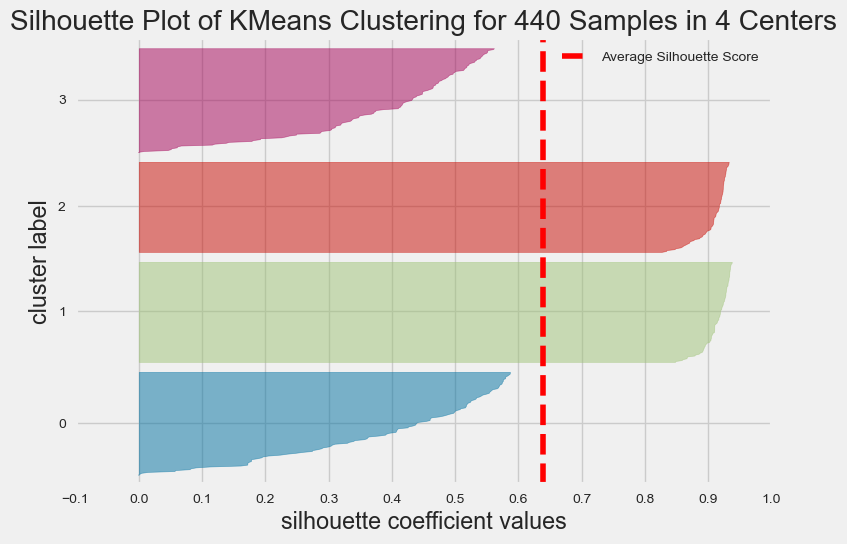

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 440 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# visualisasi untuk n = 4
model = KMeans(n_clusters =4, random_state = 42)
visualizer = SilhouetteVisualizer(model, 
                                  colors = 'yellowbrick')

visualizer.fit(final_pca)
visualizer.show()

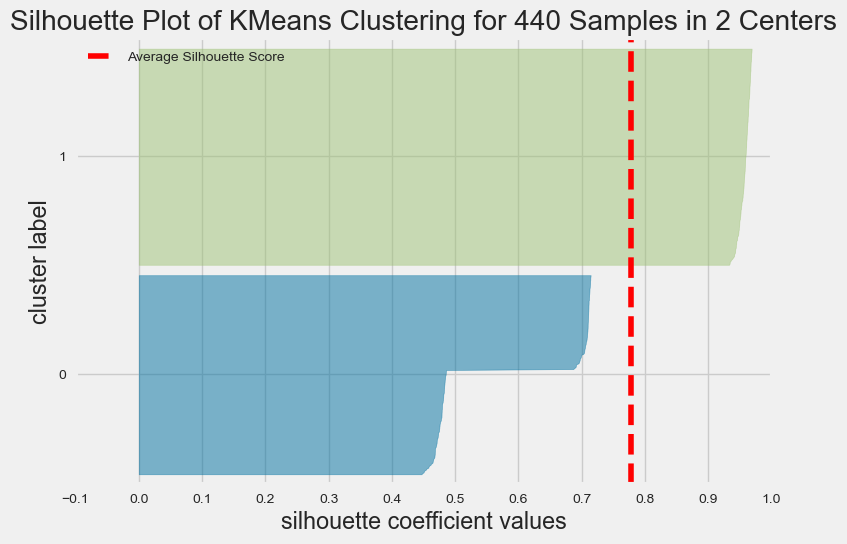

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 440 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
# visualisasi untuk n = 2
model = KMeans(n_clusters =2, random_state = 42)
visualizer = SilhouetteVisualizer(model, 
                                  colors = 'yellowbrick')

visualizer.fit(final_pca)
visualizer.show()

Meskipun sudah dibuktikan dengan elbow dan grafik silhouette, namun tetap bereksperimen mencoba nilai clusternya 2,3, dan 4. Dari beberapa percobaan dengan nilai n yang berbeda, hasil visualisas silhouette terbaik ada di n = 3. sehingga yang paling optimal n-cluster = 3.

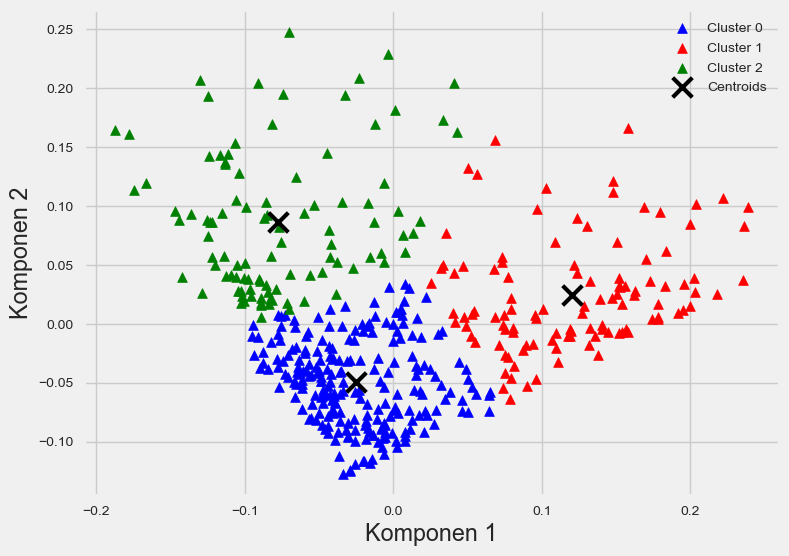

In [48]:
# Mendapatkan pusat (centroid) dari setiap cluster
centroids = kmean.cluster_centers_
cluster_labels = final_pca["cluster"].unique()

cluster_0 = final_pca[final_pca["cluster"] == 0]
cluster_1 = final_pca[final_pca["cluster"] == 1]
cluster_2 = final_pca[final_pca["cluster"] == 2]

# Visualizing clusters
plt.figure(figsize=(8, 6))

plt.scatter(cluster_0['PC1'], cluster_0['PC2'], label='Cluster 0', c='blue', marker='^')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], label='Cluster 1', c='red', marker='^')
plt.scatter(cluster_2['PC1'], cluster_2['PC2'], label='Cluster 2', c='green', marker='^')

plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=200, linewidths=3, color='black', label='Centroids')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
# plt.zlabel('PC3')

plt.legend()

plt.show()

In [49]:
# Menghitung jumlah titik data dalam setiap cluster
print('jumlah cluster 0 : ', final_pca[final_pca['cluster'] == 0].shape[0])
print('jumlah cluster 1 : ' , final_pca[final_pca['cluster'] == 1].shape[0])
print('jumlah cluster 2 : ', final_pca[final_pca['cluster'] == 2].shape[0])


jumlah cluster 0 :  229
jumlah cluster 1 :  111
jumlah cluster 2 :  100


Komponen 1 : Grocery dan Detergents paper
Komponen 2 : Milk

cluster 0: Sebanyak 229 kelompok  yang sedikit membeli milk dan sedikit membeli grocery dan detergents paper (diwakili oleh warna biru)

cluster 1: Sebanyak 111 kelompok  yang tinggi membeli gorecery dan detergents paper cenderung tinggi (diwakili oleh warna merah)

cluster 2: Sebanyak 100 kelompok yang sedikit membeli grocery dan detergents paper tetapi membeli milknya sedang cenderung tinggi (diwakili oleh warna hijau)

**Aglomerasi Clustering**

Visualisasi aglomerasi clustering

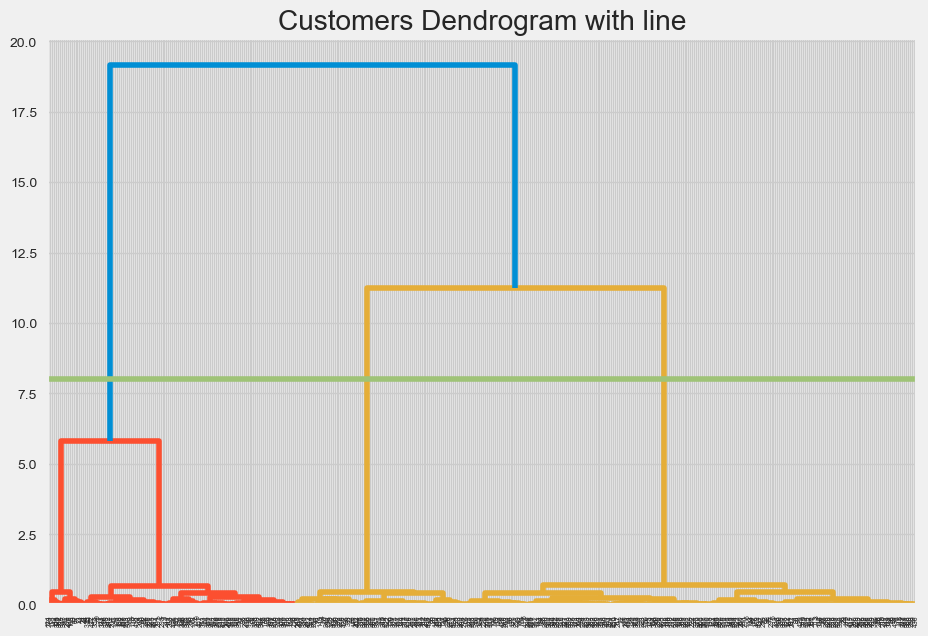

In [61]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Dendrograms dengan metode ward
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(final_pca, method='ward', metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=8, color='g', linestyle='-')
plt.show()

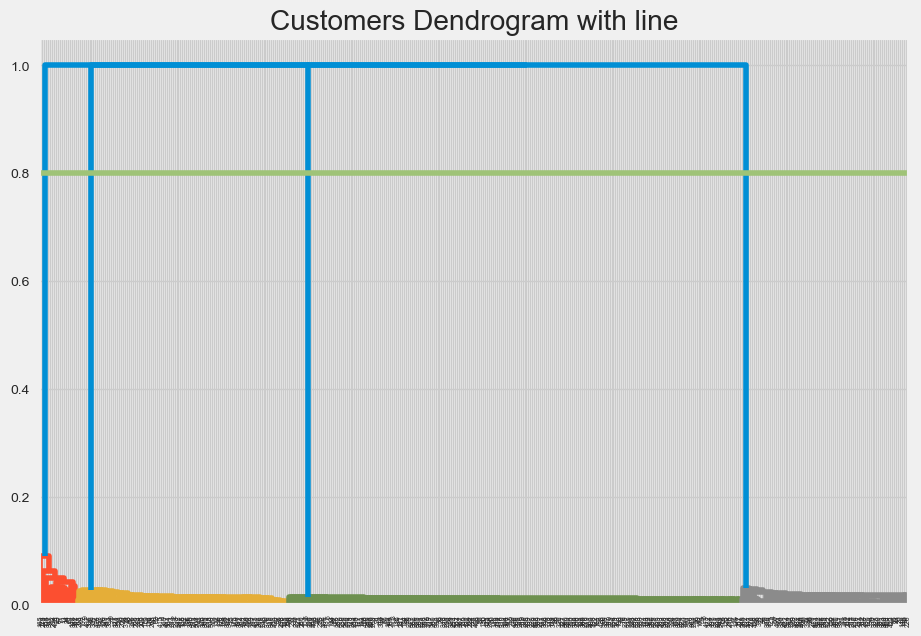

In [65]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Dendrograms dengan metode single
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(final_pca, method='single', metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=0.8, color='g', linestyle='-')
plt.show()

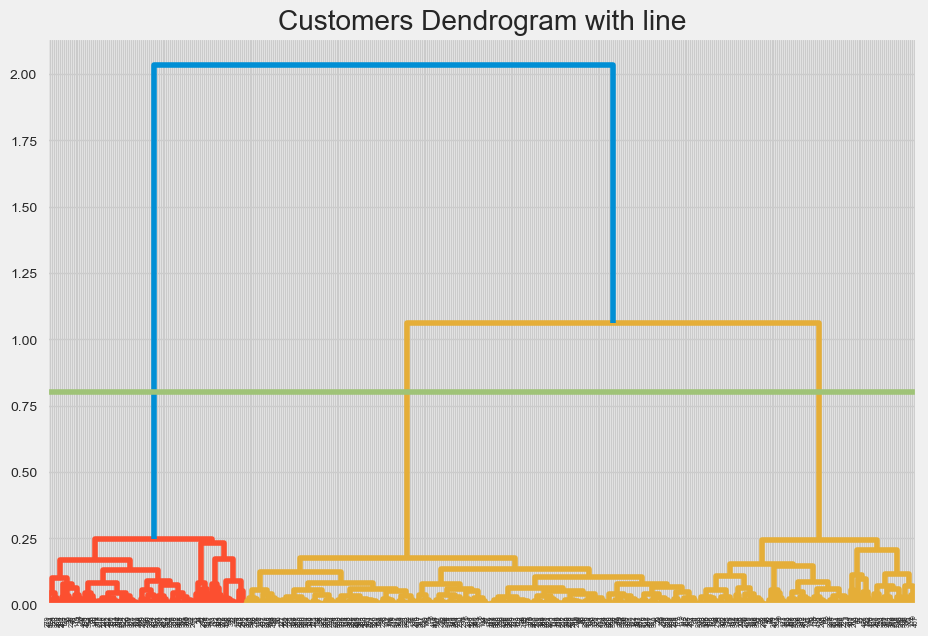

In [52]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Dendrograms dengan metode complete
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(final_pca, method='complete', metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=0.8, color='g', linestyle='-')
plt.show()

Dengan methode ward, single dan complete, diperoleh n-optimal adalah 3. selanjutnya membangun model untuk prediksi labelnya/clustering

Mengecek performansi cluster dengan methode ward, single, dan complete

In [64]:
# Silhouette untuk methode ward
clusterW = AgglomerativeClustering(n_clusters=3,
affinity='euclidean', linkage='ward')
clusterW.fit_predict(final_pca)

# Memperoleh label klaster untuk setiap sampel
labelsW = clusterW.labels_

# Silhouette Score
silhouette_scoreAW = metrics.silhouette_score(final_pca, labelsW)
print(f"Silhouette Score aglomerasi dengan methode ward: {silhouette_scoreAW}")
print(f"Cluster: {labelsW}")

Silhouette Score aglomerasi dengan methode ward: 0.8795524455632018
Cluster: [0 0 0 1 2 1 1 0 1 0 0 1 0 0 0 1 0 1 2 1 2 1 2 0 0 2 1 1 0 1 2 1 2 2 1 0 2
 0 0 1 2 2 0 0 0 0 0 1 0 1 1 1 1 0 2 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 2 0 1 2
 0 2 1 0 1 1 1 0 0 2 1 2 2 1 1 2 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1
 0 2 1 2 1 1 1 2 1 2 1 1 0 0 1 2 2 1 1 1 1 1 1 1 1 0 1 1 1 2 2 0 1 2 2 1 1
 1 2 2 1 2 1 1 0 0 2 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1
 1 1 0 0 0 2 1 1 0 1 2 2 0 1 1 0 0 2 1 1 0 1 0 1 0 2 1 1 0 0 0 1 2 0 1 1 0
 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 2 1 0 0 1 1 2 1 1 1 1 0 1 2 1 1 1
 1 1 1 2 1 0 0 0 2 0 1 1 1 1 0 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 0 2 1
 2 1 0 1 2 0 0 0 1 0 0 2 1 0 1 2 0 1 1 0 1 1 1 0 1 1 2 1 2 0 1 1 2 1 1 0 2
 1 2 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 2 1 2 0 1 1 2 1 1 1 1 0 1 1 2 1
 1 2 1 2 1 1 0 1 1 1 2 2 0 1 0 1 1 2 1 1 1 1 1 2 1 1 0 1 1 1 1 2 2 2 2 1 2
 0 1 1 1 1 0 1 1 0 0 0 0 1 0 2 2 2 2 1 0 2 1 1 0 1 2 1 2 0 1 0 1 1]


In [62]:
# Silhouette untuk methode single
clusterS = AgglomerativeClustering(n_clusters=3,
affinity='euclidean', linkage='single')
clusterS.fit_predict(final_pca)

# Memperoleh label klaster untuk setiap sampel
labelsS = clusterS.labels_

# Silhouette Score
silhouette_scoreAS = metrics.silhouette_score(final_pca, labelsS)
print(f"Silhouette Score hiearchical dengan methode single: {silhouette_scoreAS}")
print(f"Cluster: {labelsS}")

Silhouette Score hiearchical dengan methode single: 0.7381456289411228
Cluster: [2 2 2 0 0 0 0 2 0 2 2 0 1 1 1 0 2 0 0 0 0 0 0 1 1 0 0 0 2 0 0 0 0 0 0 2 0
 2 2 0 0 0 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 2 0 2 2 1 2 2 0 0 0 1 0 0 0 1 0 0
 2 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 2 2 0 0 0 2 2 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 2 2 2 0 0 0 2 1 2 0 0 0 2 2 0 2 0 2 0 0 0 0 0 2 2 1 0
 0 0 2 2 2 0 0 0 2 0 0 0 2 0 0 2 2 0 0 0 2 0 2 0 2 0 0 0 2 2 2 0 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 2 0 0 2 2 2 0 2 2 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 2 0
 0 0 1 0 0 0 0 2 2 2 0 0 2 2 1 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 2 0 0 2 2 2 2 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 2 0 0]


In [63]:
# Silhouette untuk methode complete
clusterC = AgglomerativeClustering(n_clusters=3,
affinity='euclidean', linkage='complete')
clusterC.fit_predict(final_pca)

# Memperoleh label klaster untuk setiap sampel
labelsC = clusterC.labels_

# Silhouette Score
silhouette_scoreC = metrics.silhouette_score(final_pca, labelsC)
print(f"Silhouette Score aglomerasi dengan methode ward: {silhouette_scoreC}")
print(f"Cluster: {labelsC}")

Silhouette Score aglomerasi dengan methode ward: 0.7381456289411228
Cluster: [2 2 2 0 0 0 0 2 0 2 2 0 1 1 1 0 2 0 0 0 0 0 0 1 1 0 0 0 2 0 0 0 0 0 0 2 0
 2 2 0 0 0 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 2 0 2 2 1 2 2 0 0 0 1 0 0 0 1 0 0
 2 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 2 2 0 0 0 2 2 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 2 2 2 0 0 0 2 1 2 0 0 0 2 2 0 2 0 2 0 0 0 0 0 2 2 1 0
 0 0 2 2 2 0 0 0 2 0 0 0 2 0 0 2 2 0 0 0 2 0 2 0 2 0 0 0 2 2 2 0 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 2 0 0 2 2 2 0 2 2 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 2 0
 0 0 1 0 0 0 0 2 2 2 0 0 2 2 1 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 2 0 0 2 2 2 2 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 2 0 0]


**DBSCAN Clustering**


Membangun Model untuk DBSCAN dengan data final_pca, lalu di visualisasikan dengan grafik knee. 

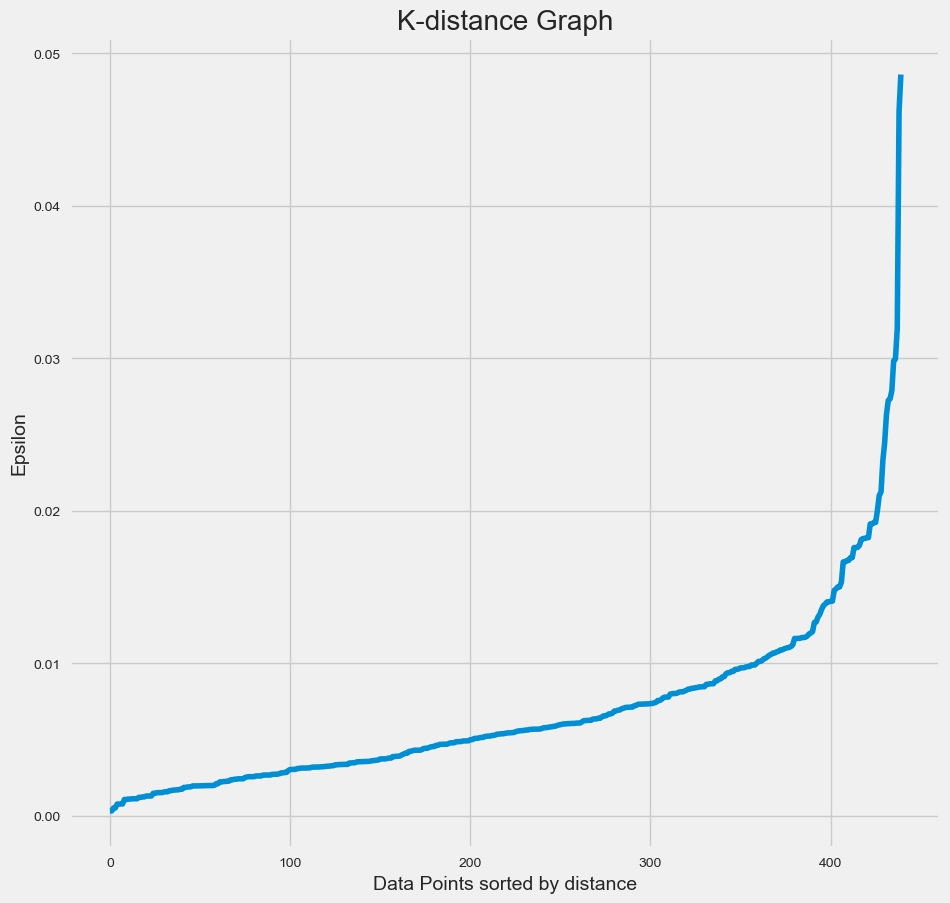

In [56]:
# menghitung jarak ke tetangga terdekat (nearest neighbors)
nearest_neighbors = NearestNeighbors(n_neighbors=6) #bisa mencoba-coba n_neighborsnya
neighbors = nearest_neighbors.fit(final_pca)
distances, indices = neighbors.kneighbors(final_pca)

# mengurutkan jarak
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# memvisualisasikan jarak dengan plot
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Terdapat peningkatan yang dignifikan pada nilai epsilon = 0.01 sampai dengan 0.05, selanjutnya melakukan iterasi untuk mendapatkan nilai epsilon dan min_samples yang terbaik untuk mendapatkan clustering yang sesuai/

In [57]:
from sklearn.metrics import silhouette_score

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in np.arange(0.02, 0.05, 0.01):  # Adjust the range as needed
    for min_samples in range(2, 14):  # Adjust the range as needed
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        db = dbscan.fit_predict(final_pca)

        if len(np.unique(db)) == 1:
            print(f'skipping check for eps = {eps} and min_samples = {min_samples}')
        else:
            score = silhouette_score(final_pca, db)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best silhouette score: {best_score} with eps={best_eps} and min_samples={best_min_samples}")


Best silhouette score: 0.8335684499647271 with eps=0.039999999999999994 and min_samples=6


In [58]:
# Import library
from sklearn.cluster import DBSCAN
import numpy as np

# Membuat model DBSCAN
dbscan = DBSCAN(eps=0.04, min_samples=6)
dblabel = dbscan.fit_predict(final_pca)

# Mendapatkan label klaster untuk setiap sampel
final_pca['cluster'] = dblabel

#menampilkan perbandingan cluster pada label yang diprediksi dari dbscan dan dari kmeans dalam array
core_samples_mask = np.zeros_like(db, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
print(db)
print(labels)

[ 0  0  0  1  2  1  1  0  1 -1  0  1 -1 -1 -1  1  0  1  2  1  2  1  2 -1
 -1  2  1  1  0  1  2  1  2  2  1  0  2 -1  0  1  2  2  0  0  0  0 -1  1
  0  1  1  1  1  0  2  1  1  0  1  0  0 -1  0  0  1  1  1 -1  1  1  2 -1
  1  2  0  2  1  0  1  1  1  0  0  2  1  2  2  1  1  2  1  1  1  1  0  1
  0  1  1  1  0  0  0  1  1  1  0  0  0  1  1 -1  2  1  2  1  1  1  2  1
  2  1  1  0 -1  1  2  2  1  1  1  1  1  1  1  1  0  1  1  1  2 -1 -1  1
  2  2  1  1  1 -1  2  1  2  1  1  0  0  2  0  0  0  1  1  1  0 -1  0  1
  1  1  0  0  1  0  1  0  1  1  1  1  1  0  0 -1  1  1  1  0  0  0  2  1
  1  0  1  2 -1  0  1  1  0  0 -1  1  1  0  1  0  1  0  2  1  1  0  0  0
  1  2  0  1  1  0  1  1  1  1  2  1  1  1  1  1  2  1  2  1  1  2  1  1
  2  2  2  1  0  0  1  1  2  1  1  1  1 -1  1 -1  1  1  1  1  1  1  2  1
  0  0  0  2 -1  1  1  1  1 -1  1  1  2  1  1  2  1  1  1  2  1  1  1  1
  1  1  1  1  1  0  2  1  2  1  0  1  2 -1  0  0  1  0 -1  2  1  0  1  2
  0  1  1  0  1  1  1  0  1  1  2  1  2 -1  1  1  2

In [59]:
# Menghitung jumlah klaster dan titik noise
n_clusters_ = len(set(dblabel)) - (1 if -1 in dblabel else 0)
n_noise_ = list(dblabel).count(-1)
#

print('Informasi perfomansi clustering dengan DBSCAN eps = 0.04')    
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, final_pca['cluster']))
print("Completeness: %0.3f" % metrics.completeness_score(labels, final_pca['cluster']))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, final_pca['cluster']))
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(labels, final_pca['cluster']))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels, final_pca['cluster']))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(final_pca, final_pca['cluster']))

Informasi perfomansi clustering dengan DBSCAN eps = 0.04
Estimated number of clusters: 3
Estimated number of noise points: 19
Homogeneity: 0.978
Completeness: 0.881
V-measure: 0.927
Adjusted Rand Index: 0.961
Adjusted Mutual Information: 0.927
Silhouette Coefficient: 0.928


Visualisasi hasil plotting dengan DBSCAN dengan epsilon = 0.04

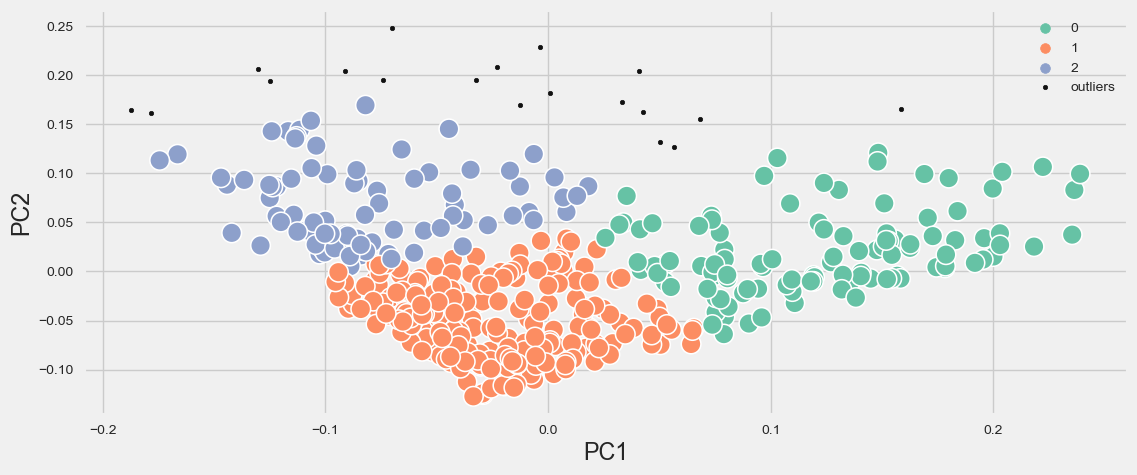

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = final_pca[final_pca['cluster'] == -1]

plt.figure(figsize=(12, 5))

sns.scatterplot('PC1', 'PC2',
                data=final_pca[final_pca['cluster'] != -1], 
                hue='cluster', palette='Set2', legend='full', s=200)

plt.scatter(outliers['PC1'], outliers['PC2'], s=10, label='outliers', c="k")
plt.legend(fontsize='12')

plt.legend()
plt.show()


### Kesimpulan

Dari hasil pengolahan data tersebut, dapat disimpulkan bahwa distributor sebaiknya meningkatkan promosi di chanel 1 untuk kategori produk bahan segar dan bahan beku, karena terdapat potensi peningkatan penjualan yang signifikan. Selain itu, selama musim- musim tertentu, distribusi produk di semua kategori di chanel hotel, restaurant, dan cafe sebaiknya ditingkatkan, mengingat adanya potensi peningkatan pembelian dari masyarakat. 

Lalu dari analisis juga ditemukan bahwa kelompok yang membeli produk kering (grocery) cenderung juga membeli produk tisu dan detergen (detergents_paper) secara bersamaan, menunjukkan adanya pola pembelian yang linear. Oleh karena itu, disarankan agar distributor mendistribusikan kedua komponen ini secara seimbang, karena dapat menjadi peluang yang baik untuk meningkatkan penjualan.

Dari analisis data yang telah dilakukan, ditemukan bahwa clustering yang paling optimal saat dicari dengan kmeans, hierachical (ward, single dan complete) serta pada DBSCAN berada pada n- cluster = 3, sesuai dengan nilai elbow dan sillhouette. Dengan ketigas algoritma clustering, nilai silhouette yang idhasilkan berkisar pada 0.92, sehingga dapat dikatakan bahwa clustering cukup baik. Jika dibandingkan performansi algoritma di atas Berdasarkan nilai silhouette nya, maka clustering yang terbaik ada pada algoritma DBSCAN selanjutnya K-means dan Hierarchical. Dari visualisasi DBSCAN dapat dilihat terdapat outlier yang tidak memengaruhi hasil clustering. Sehingga algoritma DBSCAN ini dapat dikatakan akurat dan sensitive terhadap outlier. Hasil clustering ini secara otomatis terbentuk berdasarkan kemiripan data sehingga menghasilkan kelompok tertentu yang nantinya bisa dilakukan proses lebih lanjut misalnya untuk segmentasi pasar.

